<div align = "center"> <strong>Main Function for Importing SCRAM Tables<strong><div>

In [17]:
import numpy as np
import importer
import simulator
import matplotlib.pyplot as plt

a,b,c = importer.get_SCRAM("/Users/umartinkus/onedrive - ualberta.ca/year 3/x-ray dra/code/SCRAMdata/*.h5")

target = simulator.SCRAMTarget(temps = [0], k=a,j=b,en = c)

target.temps = np.array([3500])
VH, HR = target.model()

<div align = "center">
<strong>Plotting the Simulation from SCRAM<strong>
<div>

(7.9, 10.0)

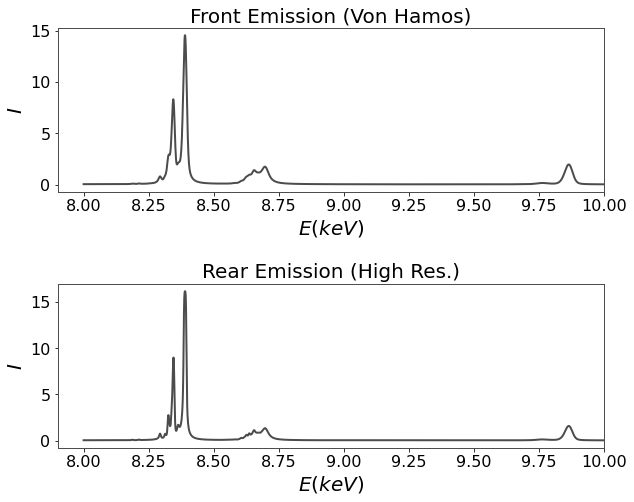

In [18]:
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.rc("lines",lw = 2, markersize = 8)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.edgecolor"] = "0.3"
plt.rcParams["figure.facecolor"] = "w"


fig,axs = plt.subplots(nrows=2,ncols=1)
fig.set_figwidth(10)
fig.set_figheight(8)
fig.tight_layout(pad=4)
fig.suptitle("")

axs[0].set_title("Front Emission (Von Hamos)")
axs[0].plot(target.en/1000,VH,color = "k", label = r"$T = 3000 eV", alpha = 0.7)
axs[0].set(xlabel = (r"$E (keV)$"))
axs[0].set(ylabel = (r"$I$"))
axs[0].set_xlim([7.9,10.0])
# axs[1].set_ylim([-.1e-3,25])

axs[1].set_title("Rear Emission (High Res.)")
axs[1].plot(target.en/1000,HR,color = "k", label = r"$T = 3000 eV", alpha = 0.7)
axs[1].set(xlabel = (r"$E (keV)$"))
axs[1].set(ylabel = (r"$I$"));
axs[1].set_xlim([7.9,10.0])
# axs[1].set_ylim([-.1e-3,25])

<div align = "center"><strong>Plotting Shots from Dec 14, 2020<strong><div>

In [19]:
from importer import get_expdata
shot_range = [38,39,40,41]
exp_path = "/Users/umartinkus/onedrive - ualberta.ca/year 3/x-ray Dra/code/expdata"

spec_VH, spec_HR, err_VH, err_HR = importer.get_expdata(exp_path,shot_range)

#Set up interpolation axes for experimental data
En_ax_VH = np.linspace(8, 9.97, 2995) #AXIS FRONT
En_ax_HR = np.linspace(8, 8.45, 2995) #AXIS REAR

spec_VH, spec_HR = spec_VH(En_ax_VH), spec_HR(En_ax_HR)
err_VH, err_HR = err_VH(En_ax_VH), err_HR(En_ax_HR)

<div align = "center"><strong>Plotting Experimental Data<strong><div>

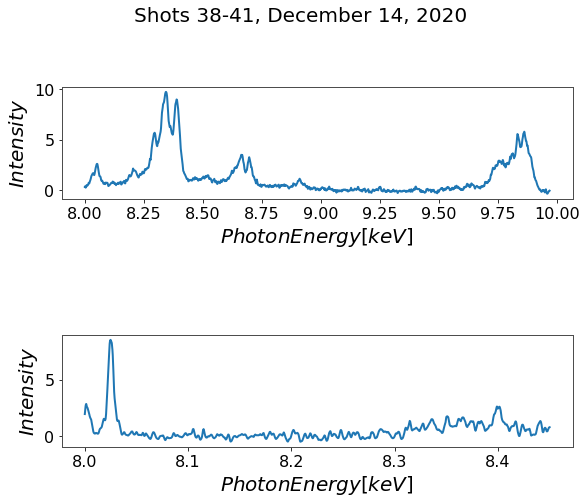

In [20]:
fig,axs = plt.subplots(nrows=2,ncols=1)
fig.tight_layout(pad=2.5)
fig.set_figwidth(10)
fig.set_figheight(8)

fig.suptitle("Shots {n1}-{n2}, December 14, 2020".format(n1=shot_range[0],n2=shot_range[-1]))
axs[0].plot(En_ax_VH, spec_VH)
axs[0].set(xlabel = (r"$Photon Energy [keV]$"))
axs[0].set(ylabel = (r"$Intensity$"))

axs[1].plot(En_ax_HR, spec_HR)
axs[1].set(xlabel = (r"$Photon Energy [keV]$"))
axs[1].set(ylabel = (r"$Intensity$"));

<div align = "center"><strong>First Attempt at Basic MCMC Model<strong><div>

In [25]:
from sampler import log_probability
import emcee
import time

#define extra arguments for log_prob function
yargs = (spec_VH,spec_HR)
yargs_er = (err_VH,err_HR)
args = (yargs,yargs_er,target)

#define MCMC parameters
nwalkers, ndim = 32,1
p0 = np.array([3.0]) + 0.1 * np.random.randn(32,1)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability,args=args)
start = time.time()
state1 = sampler.run_mcmc(p0, 50);
final_state = sampler.run_mcmc(state1,500)
end = time.time()

emcee: Exception while calling your likelihood function:
  params: [1.22070627]
  args: ((array([ 0.32158321,  0.36022211,  0.35360614, ..., -0.10341039,
       -0.09740763, -0.06449118]), array([1.95848727, 2.11018513, 2.26235481, ..., 0.79285383, 0.79624855,
       0.79964327])), (array([0.18485306, 0.15561316, 0.13938314, ..., 0.3031164 , 0.23613434,
       0.19439067]), array([0.83175435, 0.90149819, 0.97037617, ..., 0.5338772 , 0.55113963,
       0.56840205])), <simulator.SCRAMTarget object at 0x7f9c3b171160>)
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/umartinkus/Library/CloudStorage/OneDrive-ualberta.ca/Year 3/X-Ray DRA/Code/mycode/sampler.py", line 32, in log_probability
    return lp + log_likelihood(theta, y, yerr, emiss_generator)
  File "/Users/umartinkus/Library/CloudStorage/OneDrive-ualberta.ca/Year 3/X-Ray DRA/Code/mycode/sampler.py", line 13, in log_likelihood
    model_VH,model_HR = emiss_generator.model()
  File "/Users/umartinkus/Library/CloudStorage/OneDrive-ualberta.ca/Year 3/X-Ray DRA/Code/mycode/simulator.py", line 74, in model
    rear_emission = self.transportEmission(0,rear=True)
  File "/Users/umartinkus/Library/CloudStorage/OneDrive-ualberta.ca/Year 3/X-Ray DRA/Code/mycode/simulator.py", line 46, in transportEmission
    intensity_layer = layer[2]/layer[1]*(1-trans_layers[i])
KeyboardInterr

KeyboardInterrupt: 

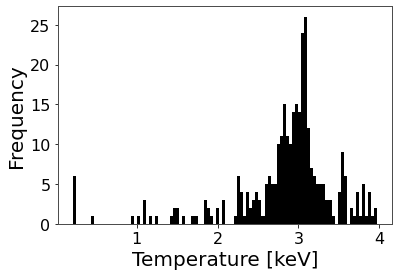

In [22]:
params = sampler.get_chain(flat = True)
fig.suptitle("Walkers After 10 Iterations - Burn Time Removed")
plt.hist(params, 100, color="k", histtype="stepfilled")
plt.xlabel("Temperature [keV]")
plt.ylabel("Frequency");

In [23]:
3/4*np.pi

2.356194490192345

In [24]:
np.pi*3/4

2.356194490192345